<a href="https://colab.research.google.com/github/Nagajyothi83/3-2-data-science/blob/main/svm_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

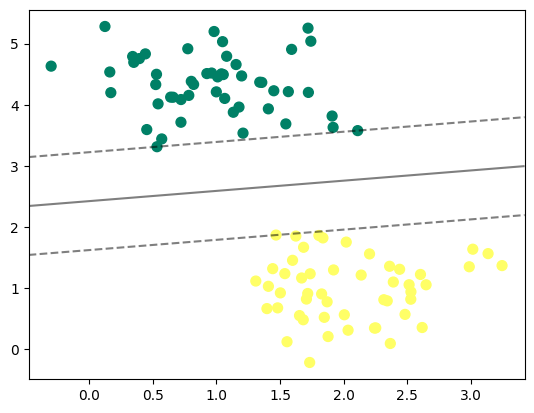

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [15]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=100, centers=2, random_state=0,cluster_std=0.50)
model=SVC(kernel='linear')
model.fit(x,y)
def decision_function(model, ax=None,plot_support=True):
  if ax is None:
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1],30)
    y = np.linspace(ylim[0], ylim[1],30)
    y,x = np.meshgrid(y,x)
    xy = np.vstack([x.ravel(), y.ravel()]).T
    P = model.decision_function(xy).reshape(x.shape)
    ax.contour(x,y,P,colors='k', levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='summer')
decision_function(model)
plt.show()
model.support_vectors_



predicted class for point [[7. 8.]]:2


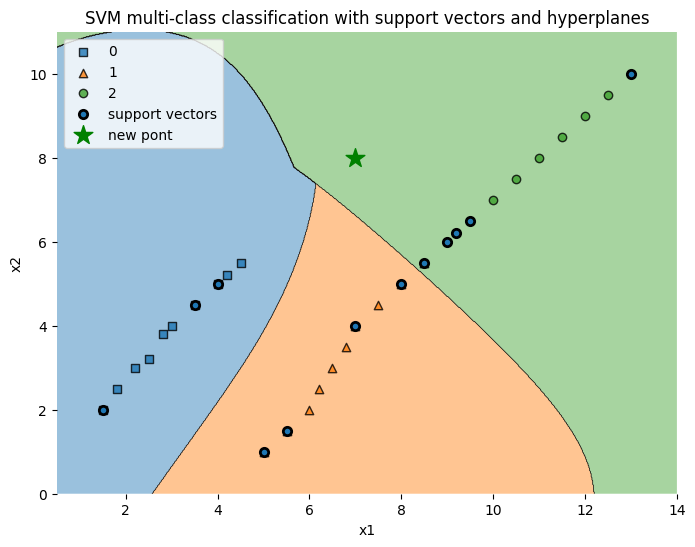

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
#define 30 sample data points
x=np.array([
    [1.5,2.0],[1.8,2.5],[2.2,3.0],[2.5,3.2],
    [2.8,3.8],[3.0,4.0],[3.5,4.5],[4.0,5.0],
    [4.2,5.2],[4.5,5.5],[5.0,1.0],[5.5,1.5],
    [6.0,2.0],[6.2,2.5],[6.5,3.0],[6.8,3.5],
    [7.0,4.0],[7.5,4.5],[8.0,5.0],[8.5,5.5],
    [9.0,6.0],[9.2,6.2],[9.5,6.5],[10.0,7.0],
    [10.5,7.5],[11.0,8.0],[11.5,8.5],[12.0,9.0],
    [12.5,9.5],[13.0,10.0]
])
y=np.array([0,0,0,0,0,0,0,0,0,0,
            1,1,1,1,1,1,1,1,1,1,
            2,2,2,2,2,2,2,2,2,2
           ])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
svm_model=SVC(kernel='rbf',decision_function_shape='ovo')
svm_model.fit(x_train,y_train)
#predict a new sample
new_point=np.array([[7.0,8.0]])
predicted_class=svm_model.predict(new_point)
print(f"predicted class for point {new_point}:{predicted_class[0]}")
plt.figure(figsize=(8,6))
plot_decision_regions(x,y,clf=svm_model,legend=2)
support_vectors=svm_model.support_vectors_
plt.scatter(support_vectors[:,0],support_vectors[:,1],edgecolors='black',linewidth=2,label="support vectors")#c='green',marker='*',s=200,label="new pont")
plt.scatter(new_point[:,0],new_point[:,1],c='green',marker='*',s=200,label="new pont")
plt.xlabel("x1")
plt.ylabel("x2")#with support vectors and hyperplanes")
plt.title("SVM multi-class classification with support vectors and hyperplanes")
plt.legend()
plt.show()